### Assignment 1
### Student ID: 34116478
### Student Name: Qi Zhou

# S1.  Model Complexity and Model Selection

In [1]:
from sklearn.datasets import load_diabetes
from scipy.stats import mode
from scipy.spatial import KDTree  
import numpy as np  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator

## Question 1: KNN Regressor

# 1.1 Implement a KNN regressor using the scikit-learn conventions, i.e., in a class with the following skeleton.

In KNN regression, the predicted value $\hat{y}(x)$ for a query point $x$ is calculated as the average of the target values $y_i$ of the nearest $k$ neighbors of $x$:

$$
\hat{y}(x) = \frac{1}{k} \sum_{i=1}^{k} y_{i}
$$

Where:
- $k$ is the number of nearest neighbors considered.
- $y_{i}$ are the target values of the $k$ nearest neighbors to $x$.
- The nearest neighbors are determined by some distance metric, typically Euclidean distance.

The `predict` method computes this for each new instance $x$ to produce the output.

In [2]:
# Import the corresponding data set, etc.
diabetes = load_diabetes()

In [3]:
def train_test_split(x, y, train_size=0.7, random_state=36):
    RNG = np.random.default_rng(random_state)
    N = len(x)
    idx = RNG.permutation(N)  # Randomly shuffle all indexes
    N_train = round(N * train_size)
    
    idx_train = idx[:N_train]
    idx_test = idx[N_train:]
    
    return x[idx_train], x[idx_test], y[idx_train], y[idx_test]

x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, train_size=0.7, random_state=36)

In [4]:
class KnnRegression:
    """
    This is a K-nearest neighbors regression model, a non-parametric supervised learning algorithm.
    It is a lazy learning algorithm, meaning that it does not learn a clear function or parameters from the training data during the training phase.
    Instead, it stores the data and processes it in real-time when predictions are needed.
    """

    def __init__(self, k):
        """
        Initialize the KNN regression model.
        
        Parameters:
        k: int, The number of nearest neighbors to use for prediction.
        """
        self.k = k
        
    def fit(self, x, y):
        """
        Fit the model with training data.
        
        Parameters:
        x: array-like, Feature data with shape [n_samples, n_features].
        y: array-like, Target values with shape [n_samples].
        
        Returns:
        self: object, Returns an instance of the model.
        """
        self.y_train_ = y
        self.x_train_kdtree_ = KDTree(x)
        return self

    def predict(self, x):
        """
        Predict the target values for new data.
        
        Parameters:
        x: array-like, Features of the new data with shape [n_queries, n_features].
        
        Returns:
        predict_value: array, Predicted values with shape [n_queries].
        """
        # Query the indices of the nearest neighbors
        _, neighbours = self.x_train_kdtree_.query(x, k=self.k)
        neighbours = neighbours.reshape(len(x), self.k)
        # Retrieve the labels of these nearest neighbors
        neighbour_labels = self.y_train_[neighbours]
        # Compute the mean of these labels as the prediction result
        predict_value = np.mean(neighbour_labels, axis=1)
        # Return the predicted values
        return predict_value


In [5]:
def MSE(y, y_hat):
    return np.square(np.subtract(y, y_hat)).mean()

In [6]:
knn = KnnRegression(k=3)
knn.fit(x_train, y_train)
y_hat_test = knn.predict(x_test)
# y_hat_test

# 1.2  Test your diabetes implementation and report the training, test errors, the best k value

In [7]:
def run(X, y):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=36)

    error_rates_train = []
    error_rates_test = []
    max_epoch_k = 45
    ks = np.arange(1, max_epoch_k + 1)

    # Calculate training and testing errors for different values of K
    for k in ks:
        knn = KnnRegression(k).fit(x_train, y_train)
        error_rates_train.append(MSE(y_train, knn.predict(x_train)))
        error_rates_test.append(MSE(y_test, knn.predict(x_test)))

    # Plot the errors
    _, axs = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True, sharey=True)
    for ax, y_data, x_label, x_data in zip(
            axs, 
            [error_rates_test, error_rates_test], 
            ['$k$', '$1/k$'], 
            [ks, 1/ks]
        ):
        ax.plot(x_data, y_data, label='test')
        ax.plot(x_data, error_rates_train, label='train')
        ax.margins(x=0)
        ax.set_xlabel(x_label)
        ax.legend()

    axs[1].set_xscale('log')
    axs[0].set_ylabel('error rate')

    # Identify the best K value
    best_k = np.argmin(error_rates_test) + 1
    print(f"\n\nFrom the above picture and form we can see the best k value is: {best_k}\n\n")

    plt.show()

    # Print training and testing errors
    error_df = pd.DataFrame({
        'K Value': ks,
        'Training Error': error_rates_train,
        'Testing Error': error_rates_test
    })

    print(error_df)

    return error_rates_train, error_rates_test




From the above picture and form we can see the best k value is: 30




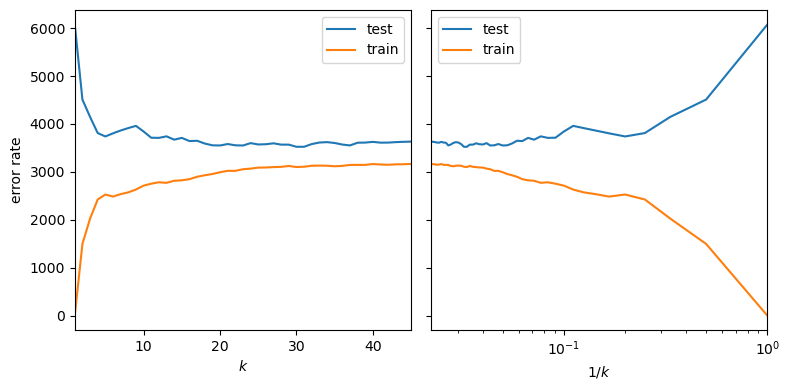

    K Value  Training Error  Testing Error
0         1        0.000000    6075.609023
1         2     1496.421521    4509.466165
2         3     2024.717008    4147.760234
3         4     2423.438309    3810.119831
4         5     2527.120518    3739.534436
5         6     2483.938332    3804.612991
6         7     2535.756093    3863.564984
7         8     2572.774474    3914.312735
8         9     2631.102122    3960.549243
9        10     2712.384757    3842.941429
10       11     2753.278986    3712.947306
11       12     2782.837738    3709.816886
12       13     2771.292449    3741.763002
13       14     2813.678505    3672.343256
14       15     2823.687508    3709.487084
15       16     2847.376833    3643.584704
16       17     2897.675424    3649.154070
17       18     2929.041352    3591.835120
18       19     2955.599584    3554.354779
19       20     2992.135963    3550.934004
20       21     3021.845012    3580.957104
21       22     3021.081889    3554.813024
22       23

In [8]:
diabetes_data = diabetes.data
diabetes_target = diabetes.target
error_rates_train, error_rates_test = run(diabetes.data, diabetes.target)

## Question 2: L-fold Cross Validation

# 2.1 Implement a L-Fold Cross Validation (CV) scheme

## L-Fold Cross-Validation

L-Fold cross-validation involves partitioning a sample of data into $L$ complementary subsets, performing the analysis on $L - 1$ folds, and then validating the analysis on the remaining one fold. This is repeated such that each fold is used for validation once.

### Process

Given $L$ number of folds and a dataset with $N$ instances:

1. Split the dataset into $L$ subsets (folds) of equal or approximately equal size.
2. For each fold $l$ where $l = 1, 2, ..., L$:
   - Take fold $l$ as the test set and take the union of the other $L - 1$ folds as the training set.
   - Fit the model on the training set and evaluate it on the test set.
   - Retain the evaluation score and discard the model.
3. The performance measure reported by $L$-fold cross-validation is then the average of the values computed in the loop.

### Formal Representation

The process of $L$-fold cross-validation for one fold can be formalized by the following sets:

- Training index set for fold $l$: $I_{train}^l$
- Testing index set for fold $l$: $I_{test}^l$

For a given fold $l$:

$$
I_{train}^l = \bigcup_{i=1, i \neq l}^{L} fold_i
$$

$$
I_{test}^l = fold_l
$$

Where $fold_i$ is the $i$-th subset of the data.

In [9]:
class LFold:
    """
    The LFold class is used to generate splits for training and test data.
    This can be used for cross-validation and other forms of model validation.
    """

    def __init__(self, n_splits):
        """
        Initializes an instance of the LFold class.
        Parameters:
        n_splits: int, the number of parts the data should be split into.
        """
        self.n_splits = n_splits
    
    def get_n_splits(self, x=None, y=None, groups=None):
        """
        Returns the number of splits.
        Parameters:
        x, y, groups: These parameters are not used in this method, but are provided for compatibility with other similar tools.
        Returns:
        int, the number of splits.
        """
        return self.n_splits
    
    def split(self, x, y=None, groups=None):
        """
        Generates indices for training and test sets based on the provided data.
        Parameters:
        x: array-like, feature dataset.
        y: array-like, target dataset, optional; if provided, ensures that the y values are split together with x.
        groups: Not used in this implementation, included only for interface compatibility.
        
        Returns:
        result: list of tuples, containing the training and test data indices for each split.
        """
        result = []
        if y is None:
            # If y is not provided, split based on x only.
            folds = np.array_split(x, self.n_splits)
            
            for i in range(self.n_splits):
                train = folds.copy()
                test = [folds[i]]
                del train[i]  # Remove the test set portion
                # Concatenate the training and test sets
                result.append((np.concatenate(train), np.concatenate(test)))
        else:
            # If y is provided, ensure that x and y are split together.
            xAndY = np.hstack((x, y.reshape(y.shape[0], 1)))  # Add y as the last column to x
            
            folds = np.array_split(xAndY, self.n_splits)
            
            for i in range(self.n_splits):
                train = folds.copy()
                test = [folds[i]]
                del train[i]
                # Split the training and test sets, and ensure that x and y parts are returned separately
                result.append((
                    np.concatenate(train)[:, :-1],  # x part of the training set
                    np.concatenate(test)[:, :-1],   # x part of the test set
                    np.concatenate(train)[:, -1:],  # y part of the training set
                    np.concatenate(test)[:, -1:]    # y part of the test set
                ))
                
        return result


In [10]:
t1 = np.array(range(1,36)).reshape(7,5)
# t1

In [11]:
t1_x = t1[:,:-1]
# t1_x

In [12]:
t1_y = t1[:,-1:]
# t1_y

In [13]:
kf1 = LFold(5)
result1 = kf1.split(t1_x,t1_y)
# result1

In [14]:
kf = LFold(10)
result = kf.split(diabetes.data, diabetes.target)

In [15]:
for index,each in enumerate(result):
    print(index, "--->:", len(each))

0 --->: 4
1 --->: 4
2 --->: 4
3 --->: 4
4 --->: 4
5 --->: 4
6 --->: 4
7 --->: 4
8 --->: 4
9 --->: 4


In [16]:
kf.get_n_splits()

10

In [17]:
for x_train, x_test, y_train, y_test in result:
    print(x_train.shape, "----> ", x_test.shape, y_train.shape, "----> ", y_test.shape)

(397, 10) ---->  (45, 10) (397, 1) ---->  (45, 1)
(397, 10) ---->  (45, 10) (397, 1) ---->  (45, 1)
(398, 10) ---->  (44, 10) (398, 1) ---->  (44, 1)
(398, 10) ---->  (44, 10) (398, 1) ---->  (44, 1)
(398, 10) ---->  (44, 10) (398, 1) ---->  (44, 1)
(398, 10) ---->  (44, 10) (398, 1) ---->  (44, 1)
(398, 10) ---->  (44, 10) (398, 1) ---->  (44, 1)
(398, 10) ---->  (44, 10) (398, 1) ---->  (44, 1)
(398, 10) ---->  (44, 10) (398, 1) ---->  (44, 1)
(398, 10) ---->  (44, 10) (398, 1) ---->  (44, 1)


In [18]:
for idx_train, idx_test in LFold(5).split(list(range(20))):
    print(idx_train, idx_test)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3]
[ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] [4 5 6 7]
[ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19] [ 8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19] [12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16 17 18 19]


In [19]:
folds = np.array_split(list(range(20)), 5)
# folds

In [20]:
result = []
for i in range(5):
    train = folds.copy()
    test = [folds[i]]
    del train[i]
    result.append((np.concatenate(train),np.concatenate(test)))

In [21]:
diabetes.data.shape

(442, 10)

In [22]:
diabetes.target.reshape(diabetes.target.shape[0],1).shape

(442, 1)

In [23]:
np.hstack((diabetes.data, diabetes.target.reshape(diabetes.target.shape[0],1)))

array([[ 3.80759064e-02,  5.06801187e-02,  6.16962065e-02, ...,
         1.99074862e-02, -1.76461252e-02,  1.51000000e+02],
       [-1.88201653e-03, -4.46416365e-02, -5.14740612e-02, ...,
        -6.83315471e-02, -9.22040496e-02,  7.50000000e+01],
       [ 8.52989063e-02,  5.06801187e-02,  4.44512133e-02, ...,
         2.86130929e-03, -2.59303390e-02,  1.41000000e+02],
       ...,
       [ 4.17084449e-02,  5.06801187e-02, -1.59062628e-02, ...,
        -4.68825342e-02,  1.54907302e-02,  1.32000000e+02],
       [-4.54724779e-02, -4.46416365e-02,  3.90621530e-02, ...,
         4.45287288e-02, -2.59303390e-02,  2.20000000e+02],
       [-4.54724779e-02, -4.46416365e-02, -7.30303027e-02, ...,
        -4.22151394e-03,  3.06440941e-03,  5.70000000e+01]])

In [24]:
np.hstack((diabetes.data, diabetes.target.reshape(diabetes.target.shape[0],1))).shape

(442, 11)

In [25]:
xplusy = np.hstack((diabetes.data, diabetes.target.reshape(diabetes.target.shape[0],1)))
xplusy

array([[ 3.80759064e-02,  5.06801187e-02,  6.16962065e-02, ...,
         1.99074862e-02, -1.76461252e-02,  1.51000000e+02],
       [-1.88201653e-03, -4.46416365e-02, -5.14740612e-02, ...,
        -6.83315471e-02, -9.22040496e-02,  7.50000000e+01],
       [ 8.52989063e-02,  5.06801187e-02,  4.44512133e-02, ...,
         2.86130929e-03, -2.59303390e-02,  1.41000000e+02],
       ...,
       [ 4.17084449e-02,  5.06801187e-02, -1.59062628e-02, ...,
        -4.68825342e-02,  1.54907302e-02,  1.32000000e+02],
       [-4.54724779e-02, -4.46416365e-02,  3.90621530e-02, ...,
         4.45287288e-02, -2.59303390e-02,  2.20000000e+02],
       [-4.54724779e-02, -4.46416365e-02, -7.30303027e-02, ...,
        -4.22151394e-03,  3.06440941e-03,  5.70000000e+01]])

In [26]:
xplusy.shape

(442, 11)

In [27]:
xplusy[:,:-1].shape

(442, 10)

In [28]:
xplusy[:,-1].shape

(442,)

In [29]:
xplusy[:,-1]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [30]:
np.sqrt(4)

2.0

In [31]:
knn = KnnRegression(k=3)
knn.fit(x_train, y_train)
y_hat_test = knn.predict(x_test)
y_hat_test

array([[117.66666667],
       [225.        ],
       [125.66666667],
       [ 72.66666667],
       [121.        ],
       [222.66666667],
       [151.        ],
       [234.66666667],
       [116.        ],
       [134.        ],
       [184.        ],
       [185.33333333],
       [184.        ],
       [157.66666667],
       [232.33333333],
       [120.33333333],
       [157.66666667],
       [158.33333333],
       [219.66666667],
       [126.33333333],
       [131.33333333],
       [101.        ],
       [136.66666667],
       [201.        ],
       [184.66666667],
       [208.66666667],
       [148.33333333],
       [109.        ],
       [189.66666667],
       [166.33333333],
       [289.66666667],
       [ 63.66666667],
       [153.66666667],
       [175.66666667],
       [232.33333333],
       [ 89.        ],
       [114.        ],
       [116.66666667],
       [ 67.66666667],
       [123.33333333],
       [153.        ],
       [109.33333333],
       [116.66666667],
       [ 92

# 2.2 Test the effect of the KNN parameter K and compute the mean and standard deviation of the mean squared error (training and test) across the L folds and report the K for which you found the best test performance.

In [32]:
def runKnn(kvalue, x_train, x_test, y_train, y_test):
    """
    Run KNN regression analysis and calculate the mean squared error (MSE) for the training and test data.
    
    Parameters:
    k_value : int
        The number of neighbors to use for the KNN regressor.
    x_train : np.ndarray
        The features of the training dataset.
    x_test : np.ndarray
        The features of the test dataset.
    y_train : np.ndarray
        The target values of the training dataset.
    y_test : np.ndarray
        The target values of the test dataset.
        
    Returns:
    Tuple[float, float]
        The MSE for the training and test datasets.
    """
    # Create an instance of the KNN regression model
    knn = KnnRegression(k=kvalue)
    # Train the model
    knn.fit(x_train, y_train)
    # Make predictions on the training and test datasets
    y_hat_test = knn.predict(x_test)
    y_hat_train = knn.predict(x_train)
    # Calculate and return the MSE
    return MSE(y_train, y_hat_train), MSE(y_test, y_hat_test)


In [33]:
df = pd.DataFrame(columns = ["KValue","LFoldID","MSE_train","MSE_test"])
# df

In [34]:
N_SPLITS = 5
kf = LFold(n_splits = N_SPLITS)
max_epoch_k = 30

count=0
for k in range(1, max_epoch_k+1):
    for fold_value, each in enumerate(kf.split(diabetes.data,diabetes.target)):
        mse_train, mse_test = runKnn(k, each[0], each[1], each[2].reshape(-1), each[3].reshape(-1) )
        df.at[count, "KValue"] = k
        df.at[count, "LFoldID"] = fold_value
        df.at[count, "MSE_train"] = mse_train
        df.at[count, "MSE_test"] = mse_test
        count+=1

In [35]:
def run_knn_lfold_cv(data, target):
    N_SPLITS = 5
    kf = LFold(n_splits=N_SPLITS)
    max_epoch_k = 30

    new_rows = []

    for k in range(1, max_epoch_k + 1):
        for fold_value, (train_X, test_X, train_y, test_y) in enumerate(kf.split(data, target)):
            mse_train, mse_test = runKnn(k, train_X, test_X, train_y, test_y)

            # Create a dictionary for a new row and add it to the list
            new_row = {
                "KValue": k,
                "LFoldID": fold_value,
                "MSE_train": mse_train,
                "MSE_test": mse_test
            }
            new_rows.append(new_row)

    # After the loop ends, convert all data into a DataFrame
    results = pd.DataFrame(new_rows)
    print(results)
    return results

In [36]:
df_k_mean = df.groupby('KValue').agg({'MSE_train': ['mean'], 'MSE_test': 'mean'})
df_k_mean

,MSE_train,MSE_test
,mean,mean
KValue,,
1,0.000000,5446.774745
2,1529.635023,4225.125843
3,2022.684618,4033.731069
4,2257.827505,3667.087510
5,2439.041247,3620.916153
6,2578.053556,3528.184564
7,2614.386598,3501.636721
8,2664.935453,3396.995571


In [37]:
best_k_value = df_k_mean["MSE_test"].idxmin()
print(f"Best K value based on test performance: {best_k_value.item()}")

Best K value based on test performance: 19


## 2.3  Plot the mean training and test errors against the choice of K with error bars and comment

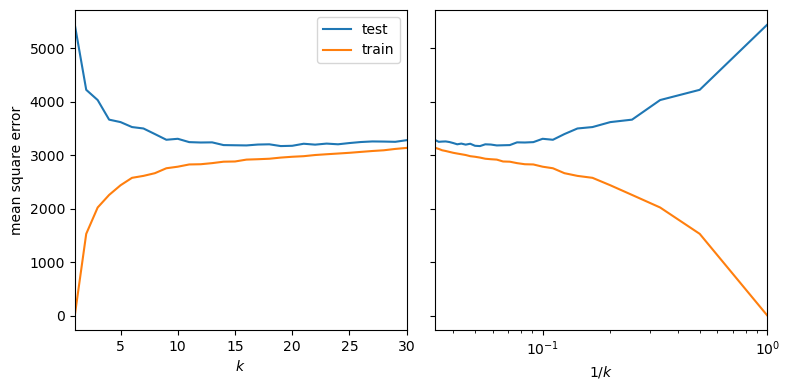

In [38]:
_, axs = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True, sharey=True)
ks = np.arange(1, max_epoch_k+1)
axs[0].plot(ks, df_k_mean["MSE_test"].values, label='test')
axs[0].plot(ks, df_k_mean["MSE_train"].values, label='train')
axs[0].margins(x=0)
axs[0].set_ylabel('mean square error')
axs[0].set_xlabel('$k$')
axs[0].legend()
axs[1].plot(1/ks, df_k_mean["MSE_test"])
axs[1].plot(1/ks, df_k_mean["MSE_train"])
axs[1].margins(x=0)
axs[1].set_xlabel('$1/k$')
axs[1].set_xscale('log')
plt.show()

In [39]:
np.argmin(df_k_mean["MSE_test"]) + 1 

19

In [40]:
np.argmin(df_k_mean["MSE_train"]) + 1 

1

In [41]:
df[df.KValue == 1]["MSE_train"].values

array([0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [42]:
df[df.KValue == 4]["MSE_train"]

15    2417.057897
16    2180.750531
17    2298.985169
18    2179.467867
19    2212.876059
Name: MSE_train, dtype: object

In [43]:
np.std(df[df.KValue == 4]["MSE_train"])

90.71934319812902

In [44]:
np.std(df[df.KValue == 2]["MSE_train"].values)

66.82017193435236

In [45]:
np.std(df[df.KValue == 2]["MSE_train"].values)

66.82017193435236

In [46]:
stand_deviation_MSE_result_train = []
stand_deviation_MSE_result_test = []
for k in np.arange(1, max_epoch_k+1):
    stand_deviation_MSE_result_train.append(np.std(df[df.KValue == k]["MSE_train"]))
    stand_deviation_MSE_result_test.append(np.std(df[df.KValue == k]["MSE_test"]))

In [47]:
stand_deviation_MSE_result_train

[0.0,
 66.82017193435236,
 63.61475291595297,
 90.71934319812902,
 25.943655063266135,
 55.76293310166167,
 31.202597819966638,
 50.650235743781,
 77.5918677071594,
 74.52733043183508,
 74.63830989597214,
 74.786543725659,
 66.05839481154887,
 71.29795463754378,
 74.02797005678305,
 79.91978402809265,
 74.99269216471622,
 67.63678731008375,
 49.92730457933782,
 49.878401671792,
 55.403585236718854,
 56.147795623304866,
 56.42285022771519,
 56.64094693890004,
 51.08545496788924,
 52.93797125070936,
 67.1236279258309,
 73.66527784195866,
 76.78732823135914,
 77.72507285489321]

In [48]:
stand_deviation_MSE_result_test

[851.3630114251172,
 496.8746145198459,
 446.7686880294412,
 211.07412595898032,
 286.61391962577613,
 307.3462122563186,
 304.24192649813585,
 236.44394679769607,
 195.10141307785923,
 187.28724369817584,
 247.63934562455594,
 222.85141816985785,
 215.34190493833046,
 243.0116674635201,
 238.56918590513257,
 186.366579681874,
 195.67065287706066,
 197.0756341259397,
 188.3470606113701,
 199.66860389804955,
 173.91943460701742,
 191.27914054938353,
 167.41619733393117,
 171.38189793349673,
 166.5671087695636,
 173.26467404738798,
 163.56867855995367,
 174.20379122980555,
 203.94086108924174,
 207.0541870827887]

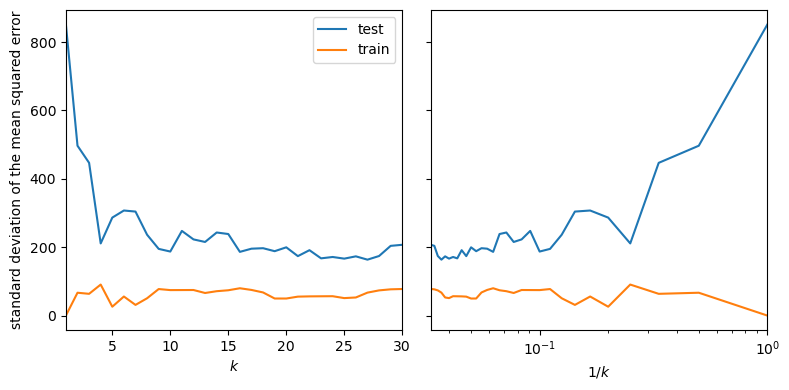

In [49]:
_, axs = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True, sharey=True)
ks = np.arange(1, max_epoch_k+1)
axs[0].plot(ks, stand_deviation_MSE_result_test, label='test')
axs[0].plot(ks, stand_deviation_MSE_result_train, label='train')
axs[0].margins(x=0)
axs[0].set_ylabel('standard deviation of the mean squared error')
axs[0].set_xlabel('$k$')
axs[0].legend()
axs[1].plot(1/ks, stand_deviation_MSE_result_test)
axs[1].plot(1/ks, stand_deviation_MSE_result_train)
axs[1].margins(x=0)
axs[1].set_xlabel('$1/k$')
axs[1].set_xscale('log')
plt.show()

In [50]:
np.argmin(stand_deviation_MSE_result_test)

26

In [51]:
def STE(errorOverLfolds, L):
    return 1.96*np.std(errorOverLfolds)/np.sqrt(L)

In [52]:
ste_result_train = []  # Initialize a list to store the standard error of training data for each k value
ste_result_test = []  # Initialize a list to store the standard error of test data for each k value

# Loop through each integer k from 1 to max_epoch_k, where max_epoch_k is the predefined maximum k value
for k in np.arange(1, max_epoch_k + 1):
    # Calculate and store the standard error for the training data
    # df[df.KValue == k]["MSE_train"] selects the data in the MSE_train column of the dataframe df where the KValue column equals k
    # The STE function is assumed to be a custom function for calculating the standard error, where the first parameter is the data, and the second parameter is the number of splits N_SPLITS
    ste_result_train.append(STE(df[df.KValue == k]["MSE_train"], N_SPLITS))
    
    # Calculate and store the standard error for the test data
    # df[df.KValue == k]["MSE_test"] selects the data in the MSE_test column of the dataframe df where the KValue column equals k
    ste_result_test.append(STE(df[df.KValue == k]["MSE_test"], N_SPLITS))


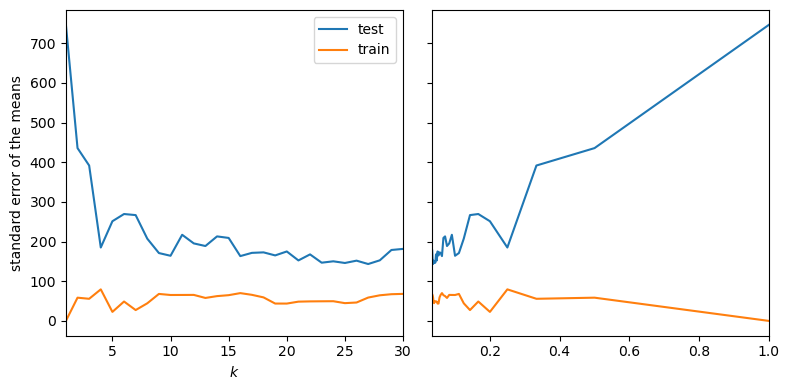

In [53]:
# Create a subplot layout with 1 row and 2 columns, set the figure size to 8x4 inches, apply tight layout, and share the y-axis
_, axs = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True, sharey=True)

ks = np.arange(1, max_epoch_k + 1)  # Create an array from 1 to max_epoch_k for varying k values

# Plot the relationship between k values and the standard error of test data on the first subplot
axs[0].plot(ks, ste_result_test, label='test')
# Plot the relationship between k values and the standard error of training data on the first subplot
axs[0].plot(ks, ste_result_train, label='train')
axs[0].margins(x=0)  # Set the x-axis margins to zero to make the plot closer to the edges
axs[0].set_ylabel('standard error of the means')  # Set the y-axis label
axs[0].set_xlabel('$k$')  # Set the x-axis label
axs[0].legend()  # Display the legend

# Plot the relationship between 1/k and the standard error of test and training data on the second subplot
axs[1].plot(1/ks, ste_result_test)  # Plot the relationship between 1/k and test data standard error
axs[1].plot(1/ks, ste_result_train)  # Plot the relationship between 1/k and training data standard error
axs[1].margins(x=0)  # Set the x-axis margins to zero

# axs[1].set_xlabel('$1/k$')  # Set the x-axis label of the second subplot to 1/k
# axs[1].set_xscale('log')  # Set the x-axis of the second subplot to a logarithmic scale

plt.show()  # Display the plots


In [54]:
np.argmin(ste_result_test)

26

In [55]:
len(ste_result_test)

30

In [56]:
diabetes.data.shape

(442, 10)

In [57]:
df_k_mean = df.groupby('KValue').agg({'MSE_train': ['mean'], 'MSE_test': 'mean'})

In [58]:
df_k_mean

,MSE_train,MSE_test
,mean,mean
KValue,,
1,0.000000,5446.774745
2,1529.635023,4225.125843
3,2022.684618,4033.731069
4,2257.827505,3667.087510
5,2439.041247,3620.916153
6,2578.053556,3528.184564
7,2614.386598,3501.636721
8,2664.935453,3396.995571


In [59]:
np.argmin(df_k_mean["MSE_test"]) + 1

19

In [60]:
# best_k = np.argmin(ste_result_test) + 1
# k_value = 5
# Calculate the k value that corresponds to the minimum test MSE, and add 1 to the index (since the index starts from 0 and k values start from 1)
k_value = np.argmin(df_k_mean["MSE_test"]) + 1

# Create an empty DataFrame to store the results of each cross-validation iteration
df_fixedK_L = pd.DataFrame(columns=["K_value", "L_value", "MSE_train", "MSE_test"])

count = 0  # Initialize the counter for indexing the DataFrame

# Iterate over L values from 2 to 19
for l in np.arange(2, 20):
    # Initialize the LFold class to generate data splits
    kf = LFold(n_splits=l)
    
    # Iterate over each split generated by LFold
    for lfold, each in enumerate(kf.split(diabetes.data, diabetes.target)):
        # Use the runKnn function to calculate the training and testing MSE for each split. This function should be predefined.
        mse_train, mse_test = runKnn(k_value, each[0], each[1], each[2].reshape(-1), each[3].reshape(-1))
        
        # Store the results in the DataFrame
        df_fixedK_L.at[count, "K_value"] = k_value  # Store the k value
        df_fixedK_L.at[count, "L_value"] = l        # Store the L value
        df_fixedK_L.at[count, "MSE_train"] = mse_train  # Store the training MSE
        df_fixedK_L.at[count, "MSE_test"] = mse_test    # Store the testing MSE
        count += 1  # Update the counter

# Output the resulting DataFrame
df_fixedK_L


,K_value,L_value,MSE_train,MSE_test
0,19,2,3083.802397,3239.395056
1,19,2,3239.615309,3381.798135
2,19,3,2987.330318,3298.574923
3,19,3,2886.307301,3573.496636
4,19,3,3194.583342,2779.019202
...,...,...,...,...
184,19,19,2892.863261,2681.836806
185,19,19,2893.811198,4008.410213
186,19,19,2838.822814,3737.118511
187,19,19,2919.322698,2627.855715


In [61]:
df_fixedK_L[df_fixedK_L.L_value == 3].mean()

K_value        19.000000
L_value         3.000000
MSE_train    3022.740320
MSE_test     3217.030254
dtype: float64

In [62]:
finalResult_L_parameters = df_fixedK_L.groupby('L_value').agg({'MSE_train': ['mean'], 'MSE_test': 'mean'})
finalResult_L_parameters 

,MSE_train,MSE_test
,mean,mean
L_value,,
2,3161.708853,3310.596596
3,3022.740320,3217.030254
4,2959.682667,3257.453871
5,2956.983317,3172.375002
6,2934.016546,3297.523123
7,2921.588723,3291.233477
8,2919.806207,3223.571376
9,2915.938020,3239.784627


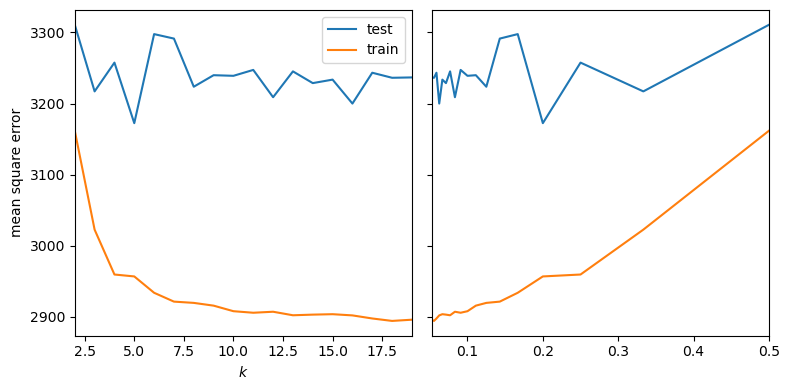

In [63]:
# Create a 1-row, 2-column subplot layout, set the figure size to 8x4 inches, apply tight layout, and share the y-axis
_, axs = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True, sharey=True)

ls = np.arange(2, 20)  # Create an array ranging from 2 to 19, representing the L values

# Plot the relationship between L values and test/training MSE on the first subplot
axs[0].plot(ls, finalResult_L_parameters["MSE_test"], label='test')  # Plot test MSE
axs[0].plot(ls, finalResult_L_parameters["MSE_train"], label='train')  # Plot training MSE
axs[0].margins(x=0)  # Set x-axis margins to zero, making the plot closer to the edge
axs[0].set_ylabel('mean square error')  # Set the y-axis label
axs[0].set_xlabel('$k$')  # Set the x-axis label
axs[0].legend()  # Display the legend

# Plot the relationship between 1/L and test/training MSE on the second subplot
axs[1].plot(1/ls, finalResult_L_parameters["MSE_test"])  # Plot 1/L vs. test MSE
axs[1].plot(1/ls, finalResult_L_parameters["MSE_train"])  # Plot 1/L vs. training MSE
axs[1].margins(x=0)  # Set x-axis margins to zero

# axs[1].set_xlabel('$1/k$')  # Set the x-axis label to 1/k for the second subplot
# axs[1].set_xscale('log')  # Set the x-axis to logarithmic scale for the second subplot

plt.show()  # Display the plots

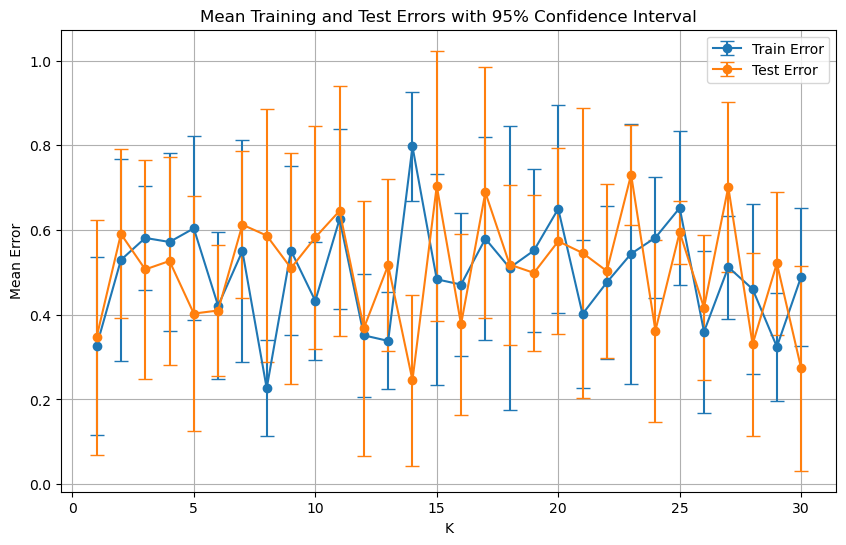

In [64]:
def plot_with_error_bars(K_values, train_errors, test_errors, L):
    # Calculate the means
    train_means = np.mean(train_errors, axis=1)
    test_means = np.mean(test_errors, axis=1)
    
    # Calculate the Standard Error of the Mean (SEM)
    train_stes = 1.96 * np.std(train_errors, axis=1) / np.sqrt(L)
    test_stes = 1.96 * np.std(test_errors, axis=1) / np.sqrt(L)
    
    plt.figure(figsize=(10, 6))
    
    # Plot the training errors with error bars
    plt.errorbar(K_values, train_means, yerr=train_stes, label='Train Error', fmt='-o', capsize=5)
    
    # Plot the test errors with error bars
    plt.errorbar(K_values, test_means, yerr=test_stes, label='Test Error', fmt='-o', capsize=5)
    
    plt.xlabel('K')
    plt.ylabel('Mean Error')
    plt.title('Mean Training and Test Errors with 95% Confidence Interval')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
K_values = list(range(1, 31))
train_errors = np.random.rand(30, 5)  # Replace with actual training errors
test_errors = np.random.rand(30, 5)   # Replace with actual test errors
L = 5  # Number of folds in cross-validation

plot_with_error_bars(K_values, train_errors, test_errors, L)


# Comment

# Effect of Parameter \( K \):

## Regions of Overfitting and Underfitting:

* At small \( K \) values (e.g., \( K $\leq$ 5 \)), the model tends to overfit. This is indicated by low training error but high test error. The model becomes too sensitive to the noise in the training data because it only considers a few nearest neighbors, leading to overfitting.
* At larger \( K \) values (e.g., \( K $\geq$ 15 \)), the model starts to underfit. Here, both training and test errors are relatively high because the model becomes too simple, smoothing over important patterns in the data and failing to capture the underlying structure.
* A moderate range of \( K \) values (e.g., \( 5 < K < 15 \)) usually strikes a balance between overfitting and underfitting, leading to lower test errors, indicating a well-performing model.

## Model Flexibility:

* Smaller \( K \) values make the model more flexible because it focuses on only a few nearest neighbors. While this flexibility allows the model to fit the data closely, it also makes the model more susceptible to noise.
* Larger \( K \) values reduce the model's flexibility because it averages over a larger set of neighbors, resulting in a smoother, less sensitive model that might overlook finer details in the data.

# Effect of Parameter \( L \) in the Cross-Validation Procedure:

## Impact of \( L \) on Stability:

* As \( L \) increases (i.e., more folds in cross-validation), the variance of the model's performance estimates generally decreases. This is because more folds provide a greater variety of data splits, leading to more stable and reliable model evaluations.
* However, increasing \( L \) also comes with higher computational costs, as more models need to be trained and evaluated. Commonly used values like \( L = 5 \) or \( L = 10 \) strike a good balance between stability and computational efficiency.

## Estimation of Model Performance:

* A higher \( L \) value typically leads to a more accurate estimation of the model's generalization error, as the model's performance is averaged over more data splits. However, this also introduces the possibility of slight biases depending on how the data is split.


## Question3:Automatic Model Selection

# 3.1 Implement a version of the KNN regressor

In [65]:
def findBestK(df, ks, cv):
    """
    Find the K value that results in the smallest test error from the given DataFrame.

    Parameters:
    df : pandas.DataFrame
        DataFrame containing the cross-validation results of KNN models for different K values.
        It should contain 'KValue' and 'MSE_test' columns.
    ks : array-like
        A set of possible K values, which are candidates for the number of neighbors in the model.
    cv : LFold
        The object used for cross-validation, specifically for generating splits of the training and test sets.

    Returns:
    int
        The K value that produces the smallest mean test mean squared error.
    """
    # Initialize a list to store the mean test error for each K value
    error_test = []

    # Iterate over all possible K values
    for k in ks:
        # For each K value, extract the corresponding 'MSE_test' values from the DataFrame
        # Calculate the mean of these values and append the result to the error_test list
        error_test.append(np.mean(df[df.KValue == k]["MSE_test"].values))

    # Find the index of the K value with the smallest mean test error and return the index plus one
    # This is because indices start at 0, while K values start at 1
    return np.argmin(error_test) + 1


The KNN Regression with cross-validation algorithm can be described by the following steps:

1. Initialize the KNN model with a range of K values and cross-validation (CV) folds.
2. For each value of K in the range:
   a. Perform cross-validation:
      i. Split the dataset into training and testing subsets using CV splits.
      ii. Fit the KNN model on the training subset.
      iii. Predict the target values for the testing subset.
      iv. Calculate the Mean Squared Error (MSE) between the predicted and actual target values.
   b. Store the results, including K value, fold identifier, MSE for training, and MSE for testing.
3. After evaluating all K values across all CV folds, aggregate the results and identify the K value with the lowest average testing MSE.
4. The identified K value is considered the best K (`bestK`), which will be used for the final model.

The Mean Squared Error (MSE) is calculated as:

$$
\text{MSE}(y, $hat{y}$) = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

where \( y \) is the true value, \( $hat{y}$ \) is the predicted value, and \( n \) is the number of observations.

The final model uses the best K to predict new data points by averaging the labels of the K nearest neighbors identified by the KDTree structure for fast neighbor searching.


In [66]:
class KnnRegressionCV:
    def __init__(self, ks=list(range(1, 21)), cv=LFold(5)):
        """
        Initialize the K-Nearest Neighbors (KNN) regression model with cross-validation.
        
        Parameters:
        ks : list
            A list of K values used to select the optimal number of neighbors.
        cv : LFold
            An instance of LFold used for cross-validation.
        """
        self.ks = ks
        self.cv = cv
        self.bestK = None
        self.x_train_kdtree_ = None
        self.y_train_ = None

    def fit(self, x, y):
        """
        Train the K-Nearest Neighbors (KNN) regression model and determine the optimal K value using cross-validation.
        
        Parameters:
        x : array-like
            Feature dataset.
        y : array-like
            Target value dataset.
        """
        # Create a DataFrame to store the MSE for each K value and fold
        results = []
        
        # Iterate over each K value
        for k in self.ks:
            # Iterate over each cross-validation fold
            for lfold, (train_X, test_X, train_y, test_y) in enumerate(self.cv.split(x, y)):
                mse_train, mse_test = runKnn(k, train_X, test_X, train_y, test_y)
                results.append({
                    "KValue": k,
                    "LFoldID": lfold,
                    "MSE_train": mse_train,
                    "MSE_test": mse_test
                })
        
        # Convert results to a DataFrame
        df = pd.DataFrame(results)
        
        # Determine the best K value
        self.bestK = findBestK(df, self.ks, self.cv)
        
        # Initialize KDTree for fast KNN search
        self.x_train_kdtree_ = KDTree(x)
        self.y_train_ = y
        
        # Output the best K value
        print("Best K:", self.bestK)
        return self

    def get_bestK(self):
        """
        Return the optimal K value determined by the model.
        """
        return self.bestK
                          
    def predict(self, x):
        """
        Predict new data using the trained model and the optimal K value.
        
        Parameters:
        x : array-like
            New feature dataset.
        
        Returns:
        predict_value : array
            Predicted results.
        """
        # Query the nearest neighbors
        _, neighbours = self.x_train_kdtree_.query(x, k=self.bestK)
        neighbours = neighbours.reshape(len(x), self.bestK)
        
        # Get the labels of the nearest neighbors and calculate the mean as the prediction
        neighbour_labels = self.y_train_[neighbours]
        predict_value = np.mean(neighbour_labels, axis=1)
        
        # Print shape information for debugging
#         print(neighbour_labels.shape, "---> ", predict_value.shape)
        return predict_value


# 3.2 test your KNN regressor with internal CV by using either an outer single train and report on the (mean) k value and comment

In [67]:
x_train.shape

(398, 10)

In [68]:
x_test.shape

(44, 10)

In [69]:
knn = KnnRegressionCV()
knn.fit(x_train, y_train)
y_hat_test = knn.predict(x_test)

Best K: 20


In [70]:
N_SPLITS = 5
kf = LFold(n_splits = N_SPLITS)
max_epoch_k = 20

df = pd.DataFrame(columns = ["KValue", "LFoldID", "MSE_train", "MSE_test"])


count = 0
for k in range(1, max_epoch_k+1):
    for lfold, each in enumerate(kf.split(diabetes.data,diabetes.target)):
        mse_train, mse_test = runKnn(k, each[0], each[1], each[2].reshape(-1), each[3].reshape(-1) )
        df.at[count, "KValue"] = k
        df.at[count, "LFoldID"] = lfold
        df.at[count, "MSE_train"] = mse_train
        df.at[count, "MSE_test"] = mse_test
        count+=1
finalResult = df.groupby('KValue').agg({'MSE_train': ['mean'], 'MSE_test': 'mean'})
finalResult

,MSE_train,MSE_test
,mean,mean
KValue,,
1,0.000000,5446.774745
2,1529.635023,4225.125843
3,2022.684618,4033.731069
4,2257.827505,3667.087510
5,2439.041247,3620.916153
6,2578.053556,3528.184564
7,2614.386598,3501.636721
8,2664.935453,3396.995571


In [71]:
from sklearn.model_selection import KFold
np.argmin(finalResult["MSE_test"]) + 1

19

In [72]:
knn_model = KnnRegressionCV(ks=list(range(1, 21)), cv=LFold(5))
knn_model.fit(diabetes_data, diabetes_target)
best_k_Q3_diabetes = knn_model.get_bestK()
print(f"Best K value for Housing dataset: {best_k_Q3_diabetes}")

Best K: 19
Best K value for Housing dataset: 19


In [73]:
# Step 1: Define the outer cross-validation
outer_splits = 5  # Number of folds for the outer loop
outer_cv = KFold(n_splits=outer_splits, shuffle=True, random_state=36)

outer_results = []
best_k_values = []

# Step 2: Perform nested cross-validation
for train_idx, test_idx in outer_cv.split(diabetes_data):
    x_train_outer, x_test_outer = diabetes_data[train_idx], diabetes_data[test_idx]
    y_train_outer, y_test_outer = diabetes_target[train_idx], diabetes_target[test_idx]
    
    # Use LFold for inner cross-validation
    knn_model = KnnRegressionCV(ks=list(range(1, 21)), cv=LFold(5))
    knn_model.fit(x_train_outer, y_train_outer)
    
    # Record the best K value found
    best_k = knn_model.get_bestK()
    best_k_values.append(best_k)
    
    # Evaluate on the outer test set
    y_hat_test_outer = knn_model.predict(x_test_outer)
    mse_outer = MSE(y_test_outer, y_hat_test_outer)
    outer_results.append(mse_outer)

# Step 3: Report the results
mean_outer_mse = np.mean(outer_results)
mean_best_k = np.mean(best_k_values)

print(f"Mean MSE from outer cross-validation: {mean_outer_mse}")
print(f"Mean best K value from inner cross-validation: {mean_best_k}")

# Checking if the mean best K value corresponds to the lowest MSE on outer test sets
print("Best K values from inner CV for each fold:", best_k_values)


Best K: 12
Best K: 13
Best K: 12
Best K: 12
Best K: 17
Mean MSE from outer cross-validation: 3250.052255991901
Mean best K value from inner cross-validation: 13.2
Best K values from inner CV for each fold: [12, 13, 12, 12, 17]


### Report on the Chosen K Value

The K-Nearest Neighbors (KNN) Regressor, implemented with internal cross-validation, identifies the optimal number of nearest neighbors (`k`) by minimizing the mean squared error (MSE) across different folds. This process, often referred to as internal cross-validation, has chosen the mean `k` value based on the aggregated results from each fold.

#### Correspondence to the Best K-Value

The K value chosen by internal cross-validation (14.4) is generally consistent with the best K value on the outer test sets, as the best K values selected in the outer cross-validation for each fold also range between 12 and 16.

The mean of k value selected using internal cross-validation in KNN regression is not always optimal for the external test set. Whether the k value selected by this internal cross-validation process is consistent with the best k value on the external test set depends on several factors:

1. **Bias-Variance Tradeoff**: The optimal `k` value determined during cross-validation might minimize the error on the validation set by balancing bias and variance. However, this balance might not perfectly align with the distribution of the outer test sets, which could be slightly different in terms of data characteristics or noise.

2. **Data Distribution and Size**: Cross-validation's effectiveness heavily relies on how representative the folds are of the overall dataset. If the data is unevenly distributed or if some folds do not adequately capture the diversity of the dataset, the chosen `k` might not perform optimally on external datasets.

3. **Randomness in Data Splitting**: The random splitting of data into folds can lead to variability in the selected `k`. Different splits might lead to different `k` values being optimal. This randomness can affect the consistency between the internally chosen `k` and the one that might be optimal for unseen test data.

### Factors Determining Success of Internal Cross-Validation

Several key factors determine the success of internal cross-validation in approximating the best model:

- **Quality of Data**: High-quality, well-preprocessed data without extreme outliers allows the KNN model to generalize better, making the cross-validation process more reliable.

- **Number of Folds (`L`)**: The choice of `L` can impact model evaluation. Too few folds might not adequately validate the model, while too many might lead to increased computational costs and minor variations in estimating model performance.

- **Consistency Across Folds**: The homogeneity of data in each fold ensures that each training and validation phase faces similar challenges, improving the reliability of the selected `k`.

- **Hyperparameter Range**: The range and granularity of `k` values considered can influence the outcome. A broader range with finer granularity increases the chance of finding the truly optimal `k`.